In [1]:
from scipy.stats import binom, poisson, norm 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# 1  Đọc dữ liệu và hiển thị 10 dòng đầu tiên của dữ liệu
df = pd.read_csv("bds.csv")
df.head(10)

,time,title,poster_temp,area_temp,final_price,type,acreage
0,2020-06-07,"Bán nhà tại p.Phạm Ngũ Lão, Quận 1, 25m2, 4.2 TỶ",môi giới,tp hồ chí minh,4.200000e+09,nhà,25.00
1,2020-08-07,Chung cư Opal Boulevard 95.49m² 3PN,môi giới,tp hồ chí minh,3.308559e+09,chung cư,95.49
2,2020-05-07,"Bán nhà Phú Lãm. 34m*4T. tặng 3 điều hòa, 1,62 tỷ",môi giới,hà nội,1.620000e+09,nhà,34.00
3,2020-07-07,Nhà trệt lầu . Hùynh thúc kháng,môi giới,cần thơ,1.840000e+09,nhà,-1.00
4,2020-06-07,"Đất Lê Văn Lương, 85m2, Sổ riêng, Hẻm xe hơi, ...",môi giới,tp hồ chí minh,2.250000e+09,đất,85.00
5,2020-04-07,Bán nhà Huyện Hóc Môn 34m²,khác,tp hồ chí minh,2.200000e+09,nhà,34.00
6,2020-06-07,Nhà 1 lửng 2PN đất 63m2 cực đẹp ĐS 17 Linh Trung,khác,tp hồ chí minh,3.350000e+09,nhà,63.00
7,2020-05-07,Đất mặt tiền Phú Nông - Vĩnh Ngọc hàng hiếm,môi giới,khánh hòa,2.073000e+09,đất,-1.00
8,2020-03-07,Nhà 1 trệt 1 lầu đường 44 - kdc 586 - cái răng,môi giới,cần thơ,2.350000e+09,nhà,-1.00
9,2020-08-07,Nhà lửng trục chính An Gia,môi giới,cần thơ,1.100000e+09,nhà,-1.00


In [3]:
so_luong = df['type'].value_counts()
print(so_luong)

type
nhà         147416
khác         63968
đất          61352
chung cư      9909
Name: count, dtype: int64


In [39]:
# đọc vào thì theo mỗi loại( thì theo cái gì đó thì mình groupby) chọn cột rao bán
so_luong_rb = df.groupby('type')['poster_temp'].value_counts().unstack() # unstack() để nó đảo lại thôi không cần cũng được
print(so_luong_rb)

poster_temp   khác  môi giới
type                        
chung cư      2903      7006
khác         11024     52944
nhà          30096    117320
đất          14914     46438


type      poster_temp
chung cư  khác             2903
          môi giới         7006
khác      khác            11024
          môi giới        52944
nhà       khác            30096
          môi giới       117320
đất       khác            14914
          môi giới        46438
dtype: int64


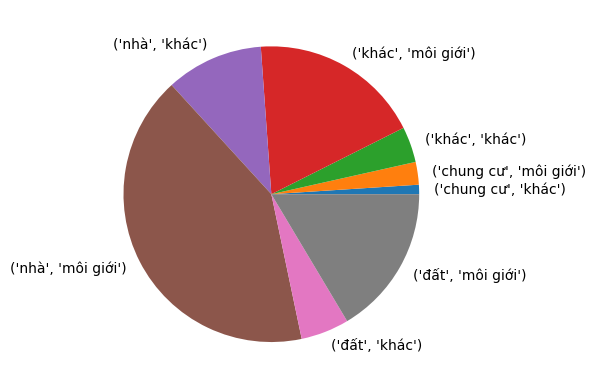

In [41]:
loai_bd_theo_tung_gia_ban = df.groupby(['type', 'poster_temp']).size()
# bởi vì nó muốn mỗi loại và loại đó thuộc rao bán nào 
# nên groupby cả hai 
print(loai_bd_theo_tung_gia_ban)
plt.pie(loai_bd_theo_tung_gia_ban, labels=loai_bd_theo_tung_gia_ban.index)
plt.show()

Nhận xét: 
- Từ biểu đồ ta thấy bất động sản nhà môi giới có nhiều nhất
- Chung cư thì ít nhất là chung cư thuộc loại khác

In [6]:
du_lieu_moi = df[(df['area_temp'] == 'tp hồ chí minh') | (df['area_temp'] == 'hà nội') | (df['area_temp'] == 'đà nẵng')]
print(du_lieu_moi.head())

         time                                              title poster_temp  \
0  2020-06-07   Bán nhà tại p.Phạm Ngũ Lão, Quận 1, 25m2, 4.2 TỶ    môi giới   
1  2020-08-07                Chung cư Opal Boulevard 95.49m² 3PN    môi giới   
2  2020-05-07  Bán nhà Phú Lãm. 34m*4T. tặng 3 điều hòa, 1,62 tỷ    môi giới   
4  2020-06-07  Đất Lê Văn Lương, 85m2, Sổ riêng, Hẻm xe hơi, ...    môi giới   
5  2020-04-07                         Bán nhà Huyện Hóc Môn 34m²        khác   

        area_temp   final_price      type  acreage  
0  tp hồ chí minh  4.200000e+09       nhà    25.00  
1  tp hồ chí minh  3.308559e+09  chung cư    95.49  
2          hà nội  1.620000e+09       nhà    34.00  
4  tp hồ chí minh  2.250000e+09       đất    85.00  
5  tp hồ chí minh  2.200000e+09       nhà    34.00  


In [7]:
du_lieu_moi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191216 entries, 0 to 282642
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time         191216 non-null  object 
 1   title        191216 non-null  object 
 2   poster_temp  191216 non-null  object 
 3   area_temp    191216 non-null  object 
 4   final_price  191216 non-null  float64
 5   type         191216 non-null  object 
 6   acreage      191216 non-null  float64
dtypes: float64(2), object(5)
memory usage: 11.7+ MB


Nhận xét: 
- Ta thấy được 191216 dòng của bảng dữ liệu mới

Hà nội: 
 count    7.985600e+04
mean     4.203026e+09
std      9.735805e+09
min      1.000000e+06
25%      2.400000e+09
50%      3.300000e+09
75%      4.500000e+09
max      9.999990e+11
Name: final_price, dtype: float64
Tp hồ chí minh:
 count    9.397900e+04
mean     4.615638e+09
std      1.306703e+10
min      1.000000e+06
25%      1.900000e+09
50%      3.250000e+09
75%      5.400000e+09
max      1.000000e+12
Name: final_price, dtype: float64
Đà nẵng:
 count    1.738100e+04
mean     4.650889e+09
std      2.523404e+10
min      1.000000e+06
25%      1.980000e+09
50%      2.700000e+09
75%      4.100000e+09
max      1.000000e+12
Name: final_price, dtype: float64


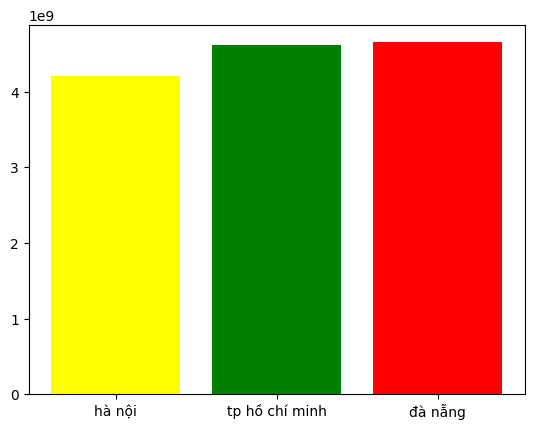

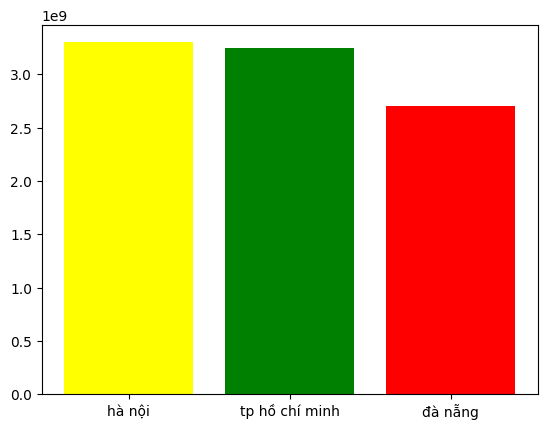

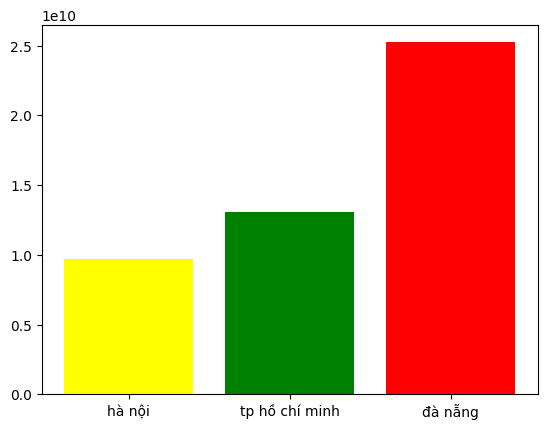

In [19]:
a = du_lieu_moi[du_lieu_moi['area_temp'] == 'hà nội']['final_price'].describe()
 
b = du_lieu_moi[du_lieu_moi['area_temp'] == 'tp hồ chí minh']['final_price'].describe()

c =  du_lieu_moi[du_lieu_moi['area_temp'] == 'đà nẵng']['final_price'].describe()
print("Hà nội: \n", a)
print("Tp hồ chí minh:\n", b)
print("Đà nẵng:\n", c)

# vẽ biểu đồ theo vùng (thì groupby vùng đó) của giá thì chọn cột giá 
# mới đầu chọn trung bình vẽ trước
vung = du_lieu_moi.groupby('area_temp')['final_price'].mean()
plt.bar(vung.index, vung.values, color=['yellow', 'green', 'red'])
plt.show()

# vẽ thứ hai là trung vị 
vung = du_lieu_moi.groupby('area_temp')['final_price'].median()
plt.bar(vung.index, vung.values, color=['yellow', 'green', 'red'])
plt.show()

# vẽ thứ ba là độ lệch chuẩn
vung = du_lieu_moi.groupby('area_temp')['final_price'].std()
plt.bar(vung.index, vung.values, color=['yellow', 'green', 'red'])
plt.show()

Nhận xét: 
- trung bình, trung vị thì giá đất xem xem nhau 
- độ lệch chuẩn thì đà nẵng cao hơn hẵn và hà nội thấp nhất

In [20]:
du_lieu_moi_2 = df[df['acreage'] != -1]
du_lieu_moi_2.head()

,time,title,poster_temp,area_temp,final_price,type,acreage
0,2020-06-07,"Bán nhà tại p.Phạm Ngũ Lão, Quận 1, 25m2, 4.2 TỶ",môi giới,tp hồ chí minh,4.200000e+09,nhà,25.00
1,2020-08-07,Chung cư Opal Boulevard 95.49m² 3PN,môi giới,tp hồ chí minh,3.308559e+09,chung cư,95.49
2,2020-05-07,"Bán nhà Phú Lãm. 34m*4T. tặng 3 điều hòa, 1,62 tỷ",môi giới,hà nội,1.620000e+09,nhà,34.00
4,2020-06-07,"Đất Lê Văn Lương, 85m2, Sổ riêng, Hẻm xe hơi, ...",môi giới,tp hồ chí minh,2.250000e+09,đất,85.00
5,2020-04-07,Bán nhà Huyện Hóc Môn 34m²,khác,tp hồ chí minh,2.200000e+09,nhà,34.00


In [21]:
du_lieu_moi_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103694 entries, 0 to 282642
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time         103694 non-null  object 
 1   title        103694 non-null  object 
 2   poster_temp  103694 non-null  object 
 3   area_temp    103694 non-null  object 
 4   final_price  103694 non-null  float64
 5   type         103694 non-null  object 
 6   acreage      103694 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.3+ MB


Nhận xét: 
- Có 103694 dòng mới 

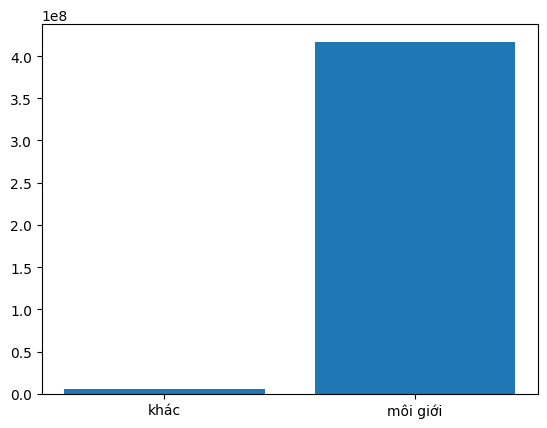

In [24]:
# Diện tích theo mỗi loại poster 
# đọc vào thi mỗi loại là groupby theo poster xong tới chọn cột diện tích 
dt_ml = du_lieu_moi_2.groupby('poster_temp')['acreage'].sum()
plt.bar(dt_ml.index, dt_ml.values)
plt.show()

Nhận xét: 
- nhìn biểu đồ cho thấy môi giá chiếm diện tích cao hơn nhiều so với những loại khác

In [26]:
# chép vào giấy chuyển đổi dữ liệu time sang date time :)))) 
# df[cột muốn chuyển] = pd.to_datetime(df[cột muốn chuyển])
df['time'] = pd.to_datetime(df['time'])
print(df['time'])

# cách lấy year trong date time: .dt.year
# cách lấy month trong date time: .dt.month
# cách lấy date trong date time :   .dt.date

0        2020-06-07
1        2020-08-07
2        2020-05-07
3        2020-07-07
4        2020-06-07
            ...    
282640   2020-04-07
282641   2020-04-07
282642   2020-02-07
282643   2020-06-07
282644   2020-04-07
Name: time, Length: 282645, dtype: datetime64[ns]


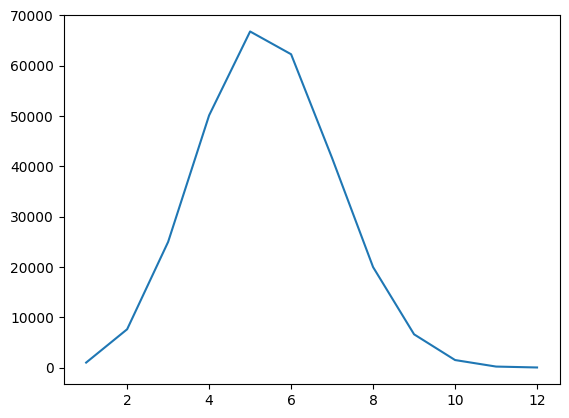

In [42]:
# đề vẽbiểuđồthểhiệnsốlượng
# bất động sản được bán theo từng tháng trong 
# năm 2020 và đưa ra nhận xét

# chọn năm 2020 trước
chon_2020 = df[df['time'].dt.year == 2020]
# theo từng tháng (thì groupby theo tháng) thì bạn chỉ cần size (để đếm số dòng theo mỗi nhóm)
theo_thang = chon_2020.groupby(chon_2020['time'].dt.month).size()
plt.plot(theo_thang)
plt.show()


Nhận xét: 
- Thì tháng 5 thì bất động sản bán nhiều nhất
- Những tháng cuối năm và đầu năm ít bạn được

In [34]:
# thì cách nhận diện thì các bạn thấy chọn 25 trong 50 
# thì nghĩ ngay đến phân phối nhị thức chọn k thằng trong n thằng 
# trong pp nhị thức thì cần tìm p, n, k 
# thì xong đề bài 


# mà p = (số lượng của lô đất > 3 tỷ) / (số lượng của tất cả lô đất)
# tỷ trong python (e9), ví dụ 3 tỷ = 3e9 trong python
p = (df['final_price'] > 3e9).mean()
# tại vì sao sử dụng mean ()
# tại vì ví dụ nếu lớn hơn 3 tỷ thì 1 còn lại thì 0 
# ví dụ 5 số: [1, 0, 1, 0, 1]
# trung bình = 3 / 5  thì nó đúng rr :)))) 
n = 50 
k = 15 
# vậy khi làm thì sau gặp dạng tương tự .mean() là xong hihi 
# nhớ chép vào giấy

# P(x = k)
# nhìn vào tờ giấy 
p_25 = binom.pmf(k, n, p)
print("Xác xuất trong 50 bất động sản được bán có 25 bất động sản có giá trên 3 tỷ: ")
print(p_25)

Xác xuất trong 50 bất động sản được bán có 25 bất động sản có giá trên 3 tỷ: 
0.010446353824822374
